In [29]:
%matplotlib inline

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform
from shapely.geometry import mapping

#do dziedziczenie azymutu eik
from shapely.geometry import Point, LineString
from shapely.ops import nearest_points
from shapely.geometry import Point



In [31]:
# Replace 'path/to/your_geojson' with the actual path to your geojson

geojson_net_path = '24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson'
geojson_fie_path = '24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson'


# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka OSM: '2024-01-31_warka_osm_2180.geojson'
# '2024-01-31_warka_osm_2180.geojson'
#Skierniewice: '2024-02-01_skierniewice_2180_osm.geojson'

#24-04

#24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson
#24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson


In [32]:
# Read geojson files
gdf_net_geo = gpd.read_file(geojson_net_path)
gdf_fie_geo = gpd.read_file(geojson_fie_path)

In [33]:
# Extract non-spatial properties
non_spatial_properties = gdf_net_geo.drop(columns='geometry')
non_spatial_properties_fie = gdf_fie_geo.drop(columns='geometry')

In [34]:
print(gdf_net_geo.head())
print(gdf_fie_geo.head())


    id ID_1                                           geometry
0  NaN    2  MULTILINESTRING ((258326.826 610651.661, 25811...
1  NaN    4  MULTILINESTRING ((258077.418 610706.306, 25805...
2  NaN    6  MULTILINESTRING ((257518.416 610840.380, 25748...
3  3.0    3  MULTILINESTRING ((258112.685 610702.554, 25807...
4  NaN    6  MULTILINESTRING ((257534.323 610835.472, 25751...
   fid    Id  Direction                       geometry
0  1.0  None          0  POINT (257195.392 610960.066)
1  2.0  None          2  POINT (257208.422 610955.122)
2  3.0  None          2  POINT (257476.443 610852.502)
3  4.0  None          2  POINT (257524.708 610843.428)
4  5.0  None          1  POINT (257568.663 610829.814)


<Axes: >

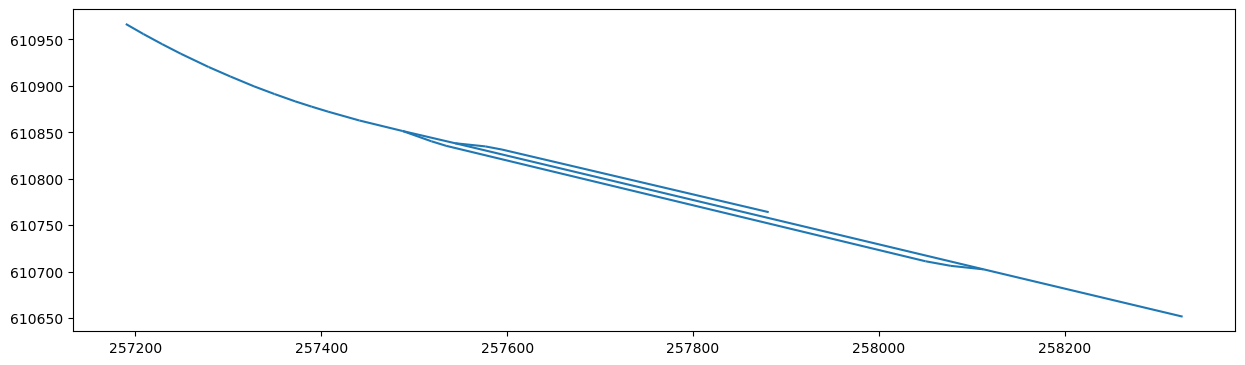

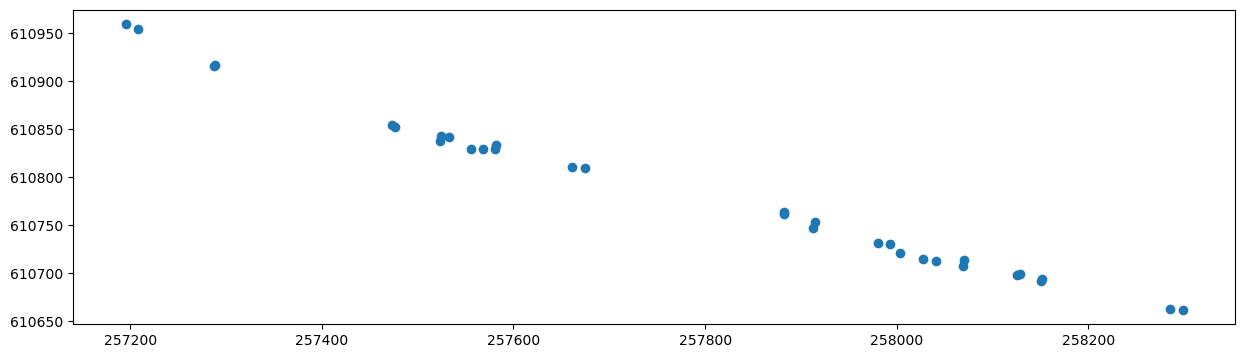

In [35]:
# Visualize the data
gdf_net_geo.plot(figsize=(15, 15))
gdf_fie_geo.plot(figsize=(15, 15))

In [36]:
# Save the GeoDataFrames as a GeoJSON files
gdf_net_geo.to_file('temp_net.geojson', driver='GeoJSON')
gdf_fie_geo.to_file('temp_fie.geojson', driver='GeoJSON')
#Paths
geojson_path2_net = 'temp_net.geojson'
geojson_path2_fie = 'temp_fie.geojson'
#Read geojson files
gdf_net_geo_translated = gpd.read_file(geojson_path2_net)
gdf_fie_geo_translated = gpd.read_file(geojson_path2_fie)

In [37]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf_net_geo_translated.bounds.min()

In [38]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf_net_geo_translated['geometry'] = gdf_net_geo_translated.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])
gdf_fie_geo_translated['geometry'] = gdf_fie_geo_translated.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [39]:
# Merge non-spatial properties back into the modified GeoDataFrame
#gdf_net_rotated_translated = gpd.GeoDataFrame(non_spatial_properties, geometry=gdf_net_rotated_translated['geometry'])
#gdf_fie_rotated_translated = gpd.GeoDataFrame(non_spatial_properties_fie, geometry=gdf_fie_rotated_translated['geometry'])

In [40]:
print(gdf_net_geo_translated.head())
print(gdf_fie_geo_translated.head())

    id ID_1                                           geometry
0  NaN    2  MULTILINESTRING ((1137.165 0.000, 923.024 50.8...
1  NaN    4  MULTILINESTRING ((887.757 54.646, 860.638 59.5...
2  NaN    6  MULTILINESTRING ((328.755 188.719, 297.906 199...
3  3.0    3  MULTILINESTRING ((923.024 50.894, 887.757 54.6...
4  NaN    6  MULTILINESTRING ((344.662 183.811, 328.755 188...
   fid    Id  Direction                 geometry
0  1.0  None          0    POINT (5.731 308.405)
1  2.0  None          2   POINT (18.761 303.461)
2  3.0  None          2  POINT (286.781 200.842)
3  4.0  None          2  POINT (335.047 191.767)
4  5.0  None          1  POINT (379.002 178.153)


<Axes: >

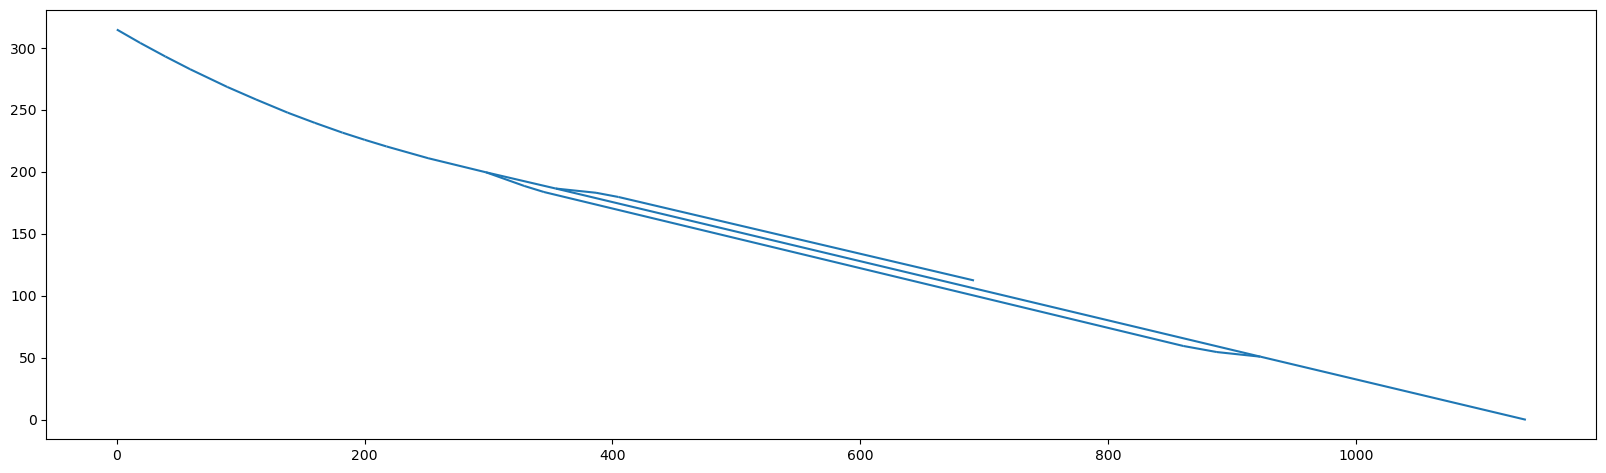

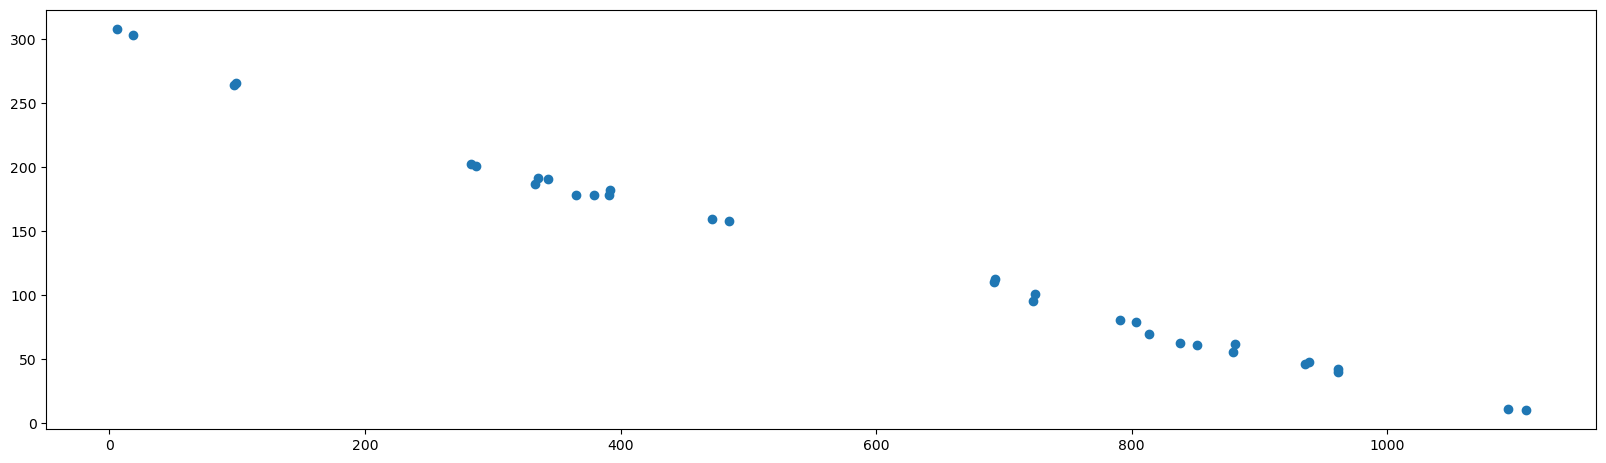

In [41]:
gdf_net_geo_translated.plot(figsize=(20, 20))
gdf_fie_geo_translated.plot(figsize=(20, 20))

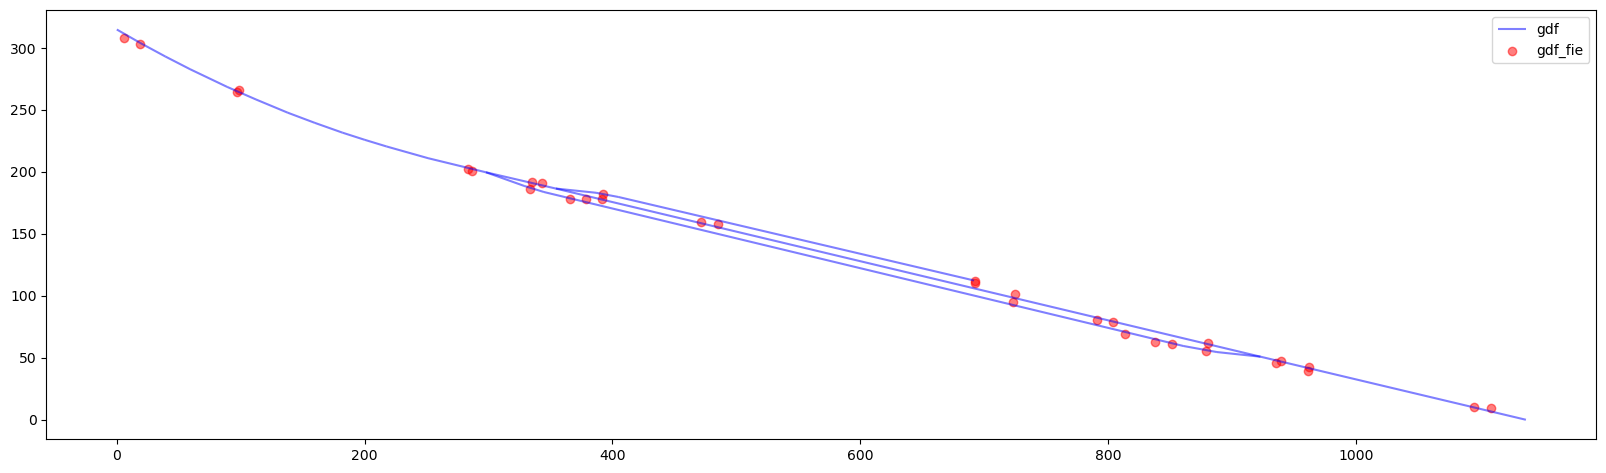

In [43]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net_geo_translated.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie_geo_translated.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [45]:
# Function to scale both x and y coordinates by a factor with origin at (0,0)
def scale_xy(geometry, factor):
    # Apply scaling transformation with origin at (0,0)
    return affine_transform(geometry, [factor, 0, 0, factor, 0, 0])

# Apply the scaling operation to the geometry column
gdf_net_geo_translated['geometry'] = gdf_net_geo_translated['geometry'].apply(scale_xy, factor=6)
gdf_fie_geo_translated['geometry'] = gdf_fie_geo_translated['geometry'].apply(scale_xy, factor=6)


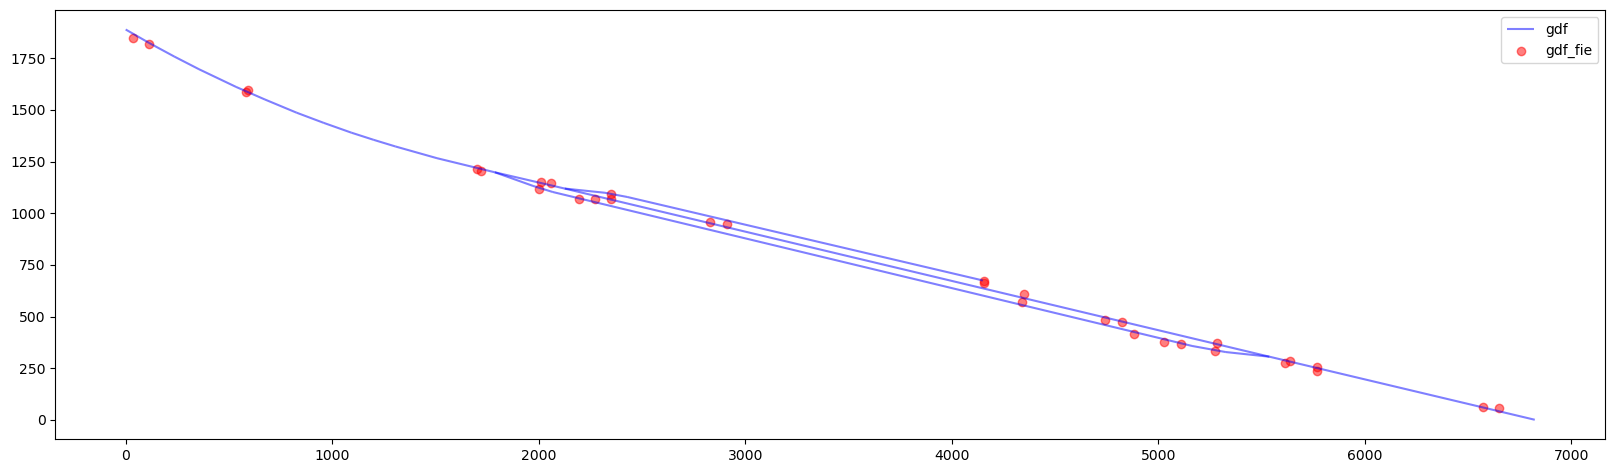

In [46]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf_net_geo_translated.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie_geo_translated.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [47]:
# Define a function to calculate azimuth with values adjusted to follow the convention
def calculate_azimuth(geometry):
    start_point = geometry.interpolate(0)
    end_point = geometry.interpolate(1)
    dx = end_point.x - start_point.x
    dy = end_point.y - start_point.y
    azimuth = np.arctan2(dy, dx) * 180 / np.pi
    azimuth = (90 - azimuth) % 360  # Adjust azimuth to follow convention
    return azimuth

# Calculate azimuth for gdf_net and add it as a new column
gdf_net_geo_translated['net_azimuth'] = gdf_net_geo_translated['geometry'].apply(calculate_azimuth)

# Print the first few rows of the modified GeoDataFrames
print("Modified gdf_net:")
print(gdf_net_geo_translated.head())




Modified gdf_net:
    id ID_1                                           geometry  net_azimuth
0  NaN    2  MULTILINESTRING ((6822.991 0.000, 5538.146 305...   283.369139
1  NaN    4  MULTILINESTRING ((5326.542 327.875, 5163.831 3...   280.267585
2  NaN    6  MULTILINESTRING ((1972.531 1132.315, 1787.433 ...   289.630132
3  3.0    3  MULTILINESTRING ((5538.146 305.362, 5326.542 3...   276.072944
4  NaN    6  MULTILINESTRING ((2067.970 1102.867, 1972.531 ...   287.147647


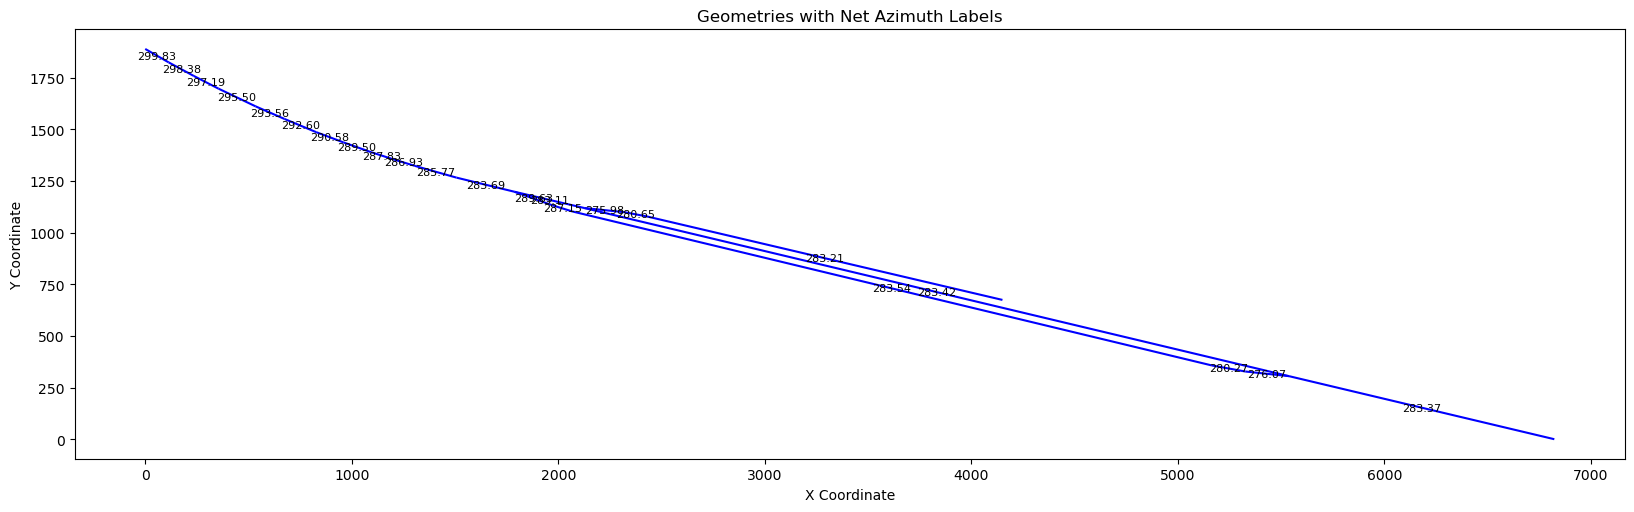

In [48]:
# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))
gdf_net_geo_translated.plot(ax=ax, color='blue')

# Add labels for net_azimuth
for idx, row in gdf_net_geo_translated.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title('Geometries with Net Azimuth Labels')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()



In [49]:
# Define a function to find nearest gdf_net element and inherit azimuth
def inherit_azimuth(row):
    nearest_geom = nearest_points(row.geometry, gdf_net_geo_translated.unary_union)
    if nearest_geom[1].is_empty:
        return None
    else:
        nearest_line = gdf_net_geo_translated.distance(nearest_geom[1]).idxmin()
        nearest_net = gdf_net_geo_translated.loc[nearest_line]
        return nearest_net['net_azimuth']

# Apply the function to calculate and inherit azimuth for gdf_fie
gdf_fie_geo_translated['azimuth_inherit'] = gdf_fie_geo_translated.apply(inherit_azimuth, axis=1)

# Print the resulting dataframe without the debug prints
print("\nModified gdf_fie:")
print(gdf_fie_geo_translated.head())



Modified gdf_fie:
   fid    Id  Direction                   geometry  azimuth_inherit
0  1.0  None          0    POINT (34.385 1850.432)       299.826480
1  2.0  None          2   POINT (112.567 1820.766)       298.380571
2  3.0  None          2  POINT (1720.689 1205.049)       283.690346
3  4.0  None          2  POINT (2010.284 1150.602)       283.107881
4  5.0  None          1  POINT (2274.012 1068.919)       283.419828


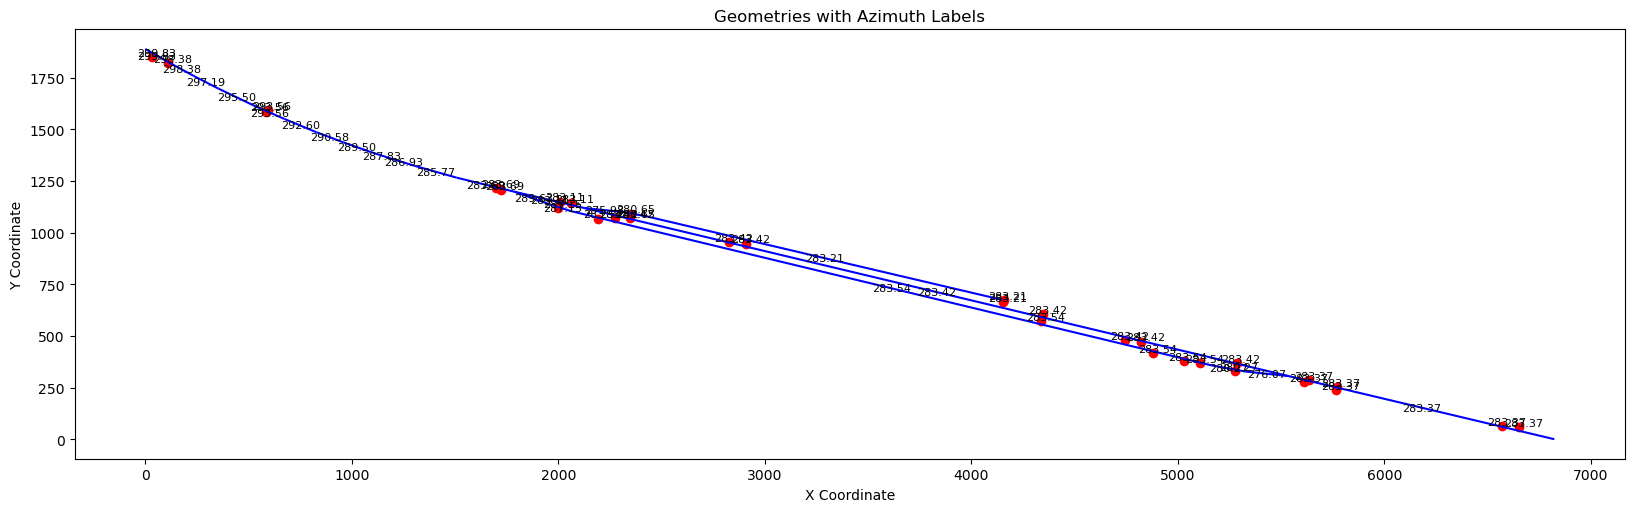

In [50]:
# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))

# Plot gdf_net
gdf_net_geo_translated.plot(ax=ax, color='blue')

# Plot gdf_fie
gdf_fie_geo_translated.plot(ax=ax, color='red')

# Add labels for net_azimuth
for idx, row in gdf_net_geo_translated.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Add labels for azimuth_inherit with spacing
for idx, row in gdf_fie_geo_translated.iterrows():
    label = f"{row['azimuth_inherit']:.2f}"
    ax.annotate(label, (row.geometry.x, row.geometry.y), xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title('Geometries with Azimuth Labels')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()


In [51]:
print(gdf_net_geo_translated.head())
print(gdf_fie_geo_translated.head())

    id ID_1                                           geometry  net_azimuth
0  NaN    2  MULTILINESTRING ((6822.991 0.000, 5538.146 305...   283.369139
1  NaN    4  MULTILINESTRING ((5326.542 327.875, 5163.831 3...   280.267585
2  NaN    6  MULTILINESTRING ((1972.531 1132.315, 1787.433 ...   289.630132
3  3.0    3  MULTILINESTRING ((5538.146 305.362, 5326.542 3...   276.072944
4  NaN    6  MULTILINESTRING ((2067.970 1102.867, 1972.531 ...   287.147647
   fid    Id  Direction                   geometry  azimuth_inherit
0  1.0  None          0    POINT (34.385 1850.432)       299.826480
1  2.0  None          2   POINT (112.567 1820.766)       298.380571
2  3.0  None          2  POINT (1720.689 1205.049)       283.690346
3  4.0  None          2  POINT (2010.284 1150.602)       283.107881
4  5.0  None          1  POINT (2274.012 1068.919)       283.419828


In [52]:
# Define a function to calculate the target azimuth
def calculate_target_azimuth(row):
    if row['Direction'] == 0:
        return row['azimuth_inherit'] + 180
    else:
        return row['azimuth_inherit']

# Apply the function to create the 'target_azimuth' field
gdf_fie_geo_translated['target_azimuth'] = gdf_fie_geo_translated.apply(calculate_target_azimuth, axis=1)

# Print the modified DataFrame
print(gdf_fie_geo_translated.head())


   fid    Id  Direction                   geometry  azimuth_inherit  \
0  1.0  None          0    POINT (34.385 1850.432)       299.826480   
1  2.0  None          2   POINT (112.567 1820.766)       298.380571   
2  3.0  None          2  POINT (1720.689 1205.049)       283.690346   
3  4.0  None          2  POINT (2010.284 1150.602)       283.107881   
4  5.0  None          1  POINT (2274.012 1068.919)       283.419828   

   target_azimuth  
0      479.826480  
1      298.380571  
2      283.690346  
3      283.107881  
4      283.419828  


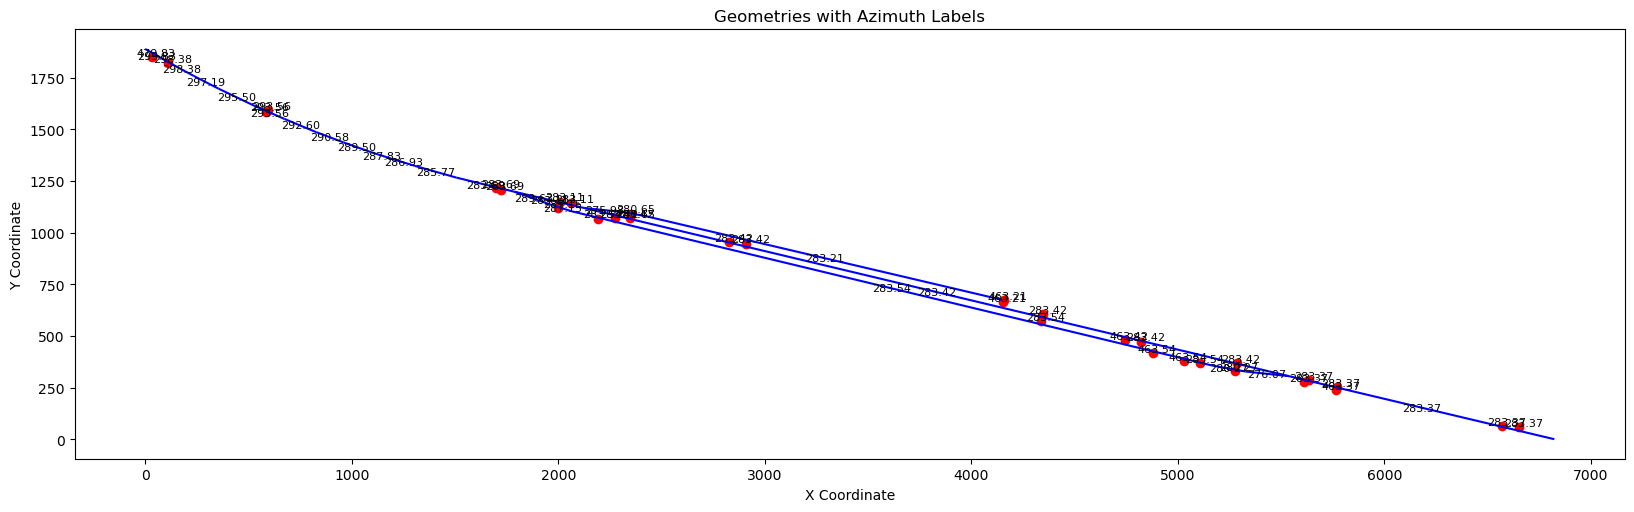

In [53]:
# Plot the geometries
fig, ax = plt.subplots(figsize=(20, 20))

# Plot gdf_net
gdf_net_geo_translated.plot(ax=ax, color='blue')

# Plot gdf_fie
gdf_fie_geo_translated.plot(ax=ax, color='red')

# Add labels for net_azimuth
for idx, row in gdf_net_geo_translated.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Add labels for target_azimuth
for idx, row in gdf_fie_geo_translated.iterrows():
    label = f"{row['target_azimuth']:.2f}"  # Use 'target_azimuth' field
    ax.annotate(label, (row.geometry.x, row.geometry.y), xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

# Set plot title and labels
ax.set_title('Geometries with Azimuth Labels')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()


In [54]:
# Save the GeoDataFrame as a GeoJSON file
gdf_net_geo_translated.to_file('24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-output_Tarnowo-Pom.geojson', driver='GeoJSON')
gdf_fie_geo_translated.to_file('24-04-24_template_geo2scheme_geojson_FIE-output_Tarnowo-Pom.geojson', driver='GeoJSON')

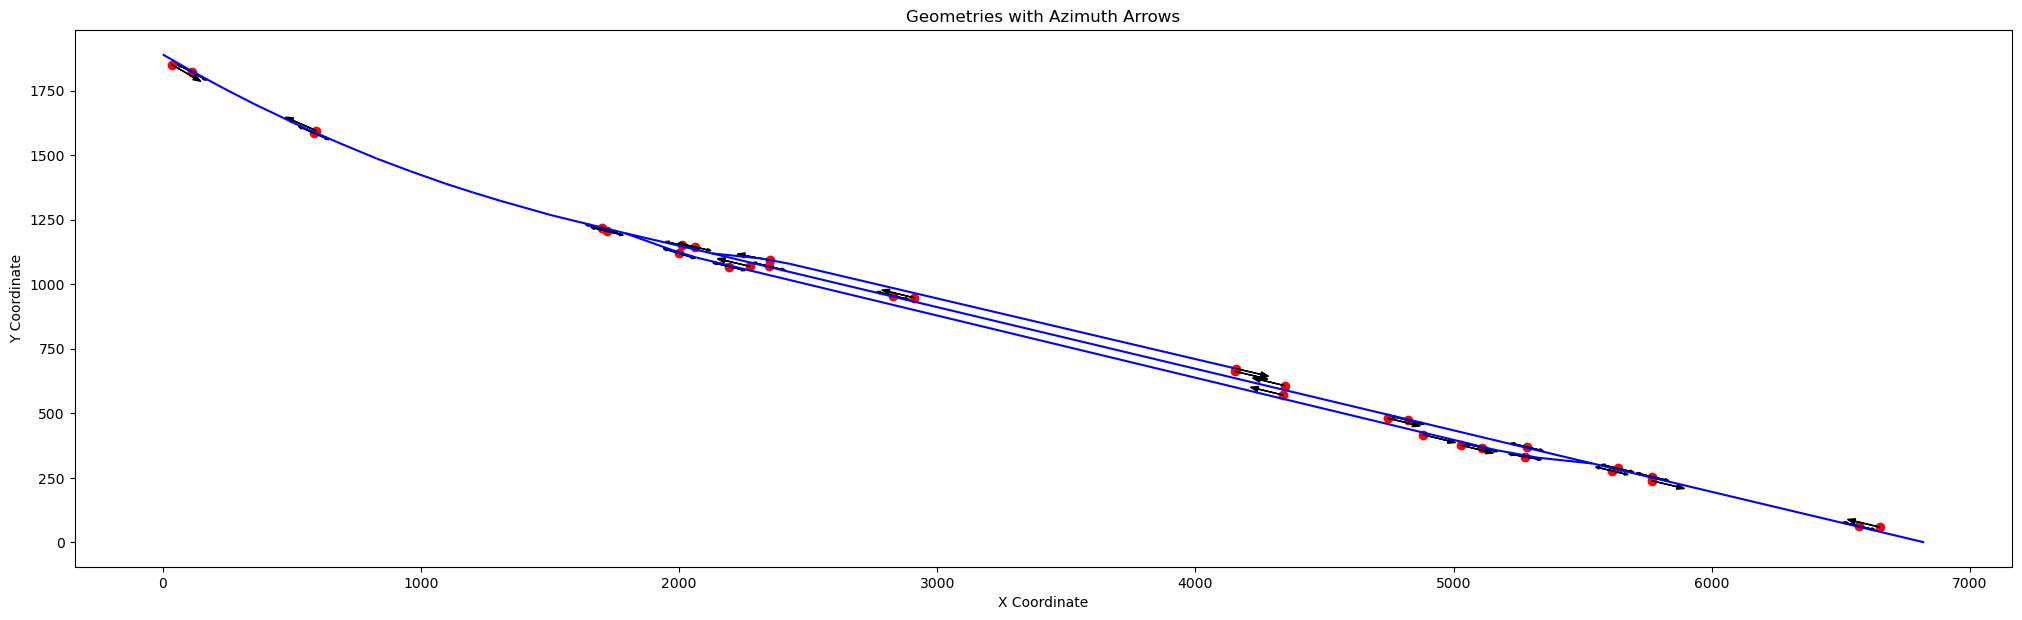

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Plot the geometries
fig, ax = plt.subplots(figsize=(25, 25))

# Plot gdf_net
gdf_net_geo_translated.plot(ax=ax, color='blue')

# Plot gdf_fie
gdf_fie_geo_translated.plot(ax=ax, color='red')

# Add labels for net_azimuth
#for idx, row in gdf_net.iterrows():
#    centroid = row.geometry.centroid
#    ax.text(centroid.x, centroid.y, f"{row['net_azimuth']:.2f}", fontsize=8, ha='center', va='center')

# Plot arrows for target_azimuth
for idx, row in gdf_fie_geo_translated.iterrows():
    azimuth = row['target_azimuth']
    angle_rad = np.deg2rad(90 - azimuth)  # Convert azimuth to radians, and adjust to align with the standard plotting orientation
    arrow_length = 100  # Length of the arrow
    if row['Direction'] == 2:
        arrow_length *= 0.5  # Reduce arrow length for Direction equal to 2
        dx = arrow_length * np.cos(angle_rad)  # X component of arrow
        dy = arrow_length * np.sin(angle_rad)  # Y component of arrow
        ax.arrow(row.geometry.x, row.geometry.y, dx, dy, head_width=10, head_length=15, fc='k', ec='k')  # Plot smaller arrow
        
        # Plot arrow rotated 180 degrees
        dx180 = arrow_length * np.cos(angle_rad + np.pi)  # X component of arrow rotated 180 degrees
        dy180 = arrow_length * np.sin(angle_rad + np.pi)  # Y component of arrow rotated 180 degrees
        ax.arrow(row.geometry.x, row.geometry.y, dx180, dy180, head_width=10, head_length=15, fc='k', ec='k')  # Plot rotated arrow
    else:
        dx = arrow_length * np.cos(angle_rad)  # X component of arrow
        dy = arrow_length * np.sin(angle_rad)  # Y component of arrow
        ax.arrow(row.geometry.x, row.geometry.y, dx, dy, head_width=20, head_length=30, fc='k', ec='k')  # Plot arrow

# Set plot title and labels
ax.set_title('Geometries with Azimuth Arrows')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show plot
plt.show()
